In [1]:
import pandas as pd

df = pd.read_csv("/Users/dzikipm1/Downloads/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np
classCol = df['Class']
df = df.drop(columns=['Class'])
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df['class'] = classCol
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [3]:
conda install -c districtdatalabs yellowbrick

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


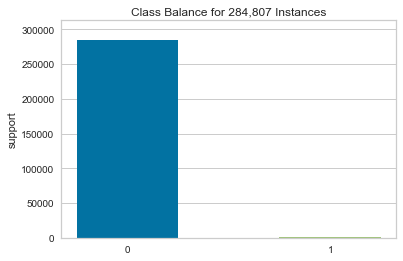

In [4]:
from yellowbrick.target import ClassBalance
%matplotlib inline
visualizer = ClassBalance()
visualizer.fit(df['class']) 
visualizer.show()

Plot shows that the data is heavily skewed towards being classified as 0, which makes class of 1 hard to detect/predict

In [5]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'class'].values
y = df.loc[:, df.columns == 'class'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=None)

In [6]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

#try svc with different c values
SVM_C = [.00001, .0001, 0.001]
FPR, TPR = [], []
for c in SVM_C:
    pipe_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=14, penalty='l1', solver='liblinear', class_weight='balanced',
                                               C=c, multi_class='auto', max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    clf = svm.SVC(C = c, gamma = 'auto', kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.506, C=      0.00001, TPR 0.214, FPR 0.000
Test Accuracy= 0.977, C=      0.00010, TPR 0.560, FPR 0.000
Test Accuracy= 0.980, C=      0.00100, TPR 0.762, FPR 0.000


As C value increases for regularization, performance for the SVC gets better

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,),max_iter=300)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 99.94%
[[142145     11]
 [    76    172]]


In [8]:
from sklearn.tree import DecisionTreeClassifier

FPR, TPR = [], []
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
TPR += [tp/(tp+fn)]
FPR += [fp/(fp+tn)]
print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.980, TPR 0.758, FPR 0.000


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Alpha beta pruning constant
Alpha = 0.1
tree = DecisionTreeClassifier(random_state=0)
tree.ccp_alpha = Alpha
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)
clf2 = tree.fit(X_tr, y_tr)
print(f'DT2 (pruned) accuracy= {accuracy_score(y_ts, clf2.predict(X_ts)):.2f}')

DT2 (pruned) accuracy= 1.00


Pruning increased accuracy of decision tree classifier

In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,),max_iter=300, alpha = 1)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 99.91%
[[142136     20]
 [   115    133]]


MLP classifier was already very accurate without regularization - performance stayed at the same level

### SVC with varying train test splits

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state=None)

#try svc with different c values
SVM_C = [.00001, .0001, 0.001]
FPR, TPR = [], []
for c in SVM_C:
    pipe_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=14, penalty='l1', solver='liblinear', class_weight='balanced',
                                               C=c, multi_class='auto', max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    clf = svm.SVC(C = c, gamma = 'auto', kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.510, C=      0.00001, TPR 0.204, FPR 0.000
Test Accuracy= 0.970, C=      0.00010, TPR 0.556, FPR 0.000
Test Accuracy= 0.981, C=      0.00100, TPR 0.782, FPR 0.000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=None)

#try svc with different c values
SVM_C = [.00001, .0001, 0.001]
FPR, TPR = [], []
for c in SVM_C:
    pipe_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=14, penalty='l1', solver='liblinear', class_weight='balanced',
                                               C=c, multi_class='auto', max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    clf = svm.SVC(C = c, gamma = 'auto', kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.499, C=      0.00001, TPR 0.000, FPR 0.000
Test Accuracy= 0.929, C=      0.00010, TPR 0.534, FPR 0.000
Test Accuracy= 0.977, C=      0.00100, TPR 0.788, FPR 0.000


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=None)

#try svc with different c values
SVM_C = [.00001, .0001, 0.001]
FPR, TPR = [], []
for c in SVM_C:
    pipe_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=14, penalty='l1', solver='liblinear', class_weight='balanced',
                                               C=c, multi_class='auto', max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    clf = svm.SVC(C = c, gamma = 'auto', kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.463, C=      0.00001, TPR 0.000, FPR 0.000
Test Accuracy= 0.640, C=      0.00010, TPR 0.432, FPR 0.000
Test Accuracy= 0.985, C=      0.00100, TPR 0.782, FPR 0.000


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,random_state=None)

#try svc with different c values
SVM_C = [.00001, .0001, 0.001]
FPR, TPR = [], []
for c in SVM_C:
    pipe_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=14, penalty='l1', solver='liblinear', class_weight='balanced',
                                               C=c, multi_class='auto', max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    clf = svm.SVC(C = c, gamma = 'auto', kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.998, C=      0.00001, TPR 0.000, FPR 0.000
Test Accuracy= 0.485, C=      0.00010, TPR 0.329, FPR 0.000
Test Accuracy= 0.972, C=      0.00100, TPR 0.738, FPR 0.000


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95,random_state=None)

#try svc with different c values
SVM_C = [.00001, .0001, 0.001]
FPR, TPR = [], []
for c in SVM_C:
    pipe_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=14, penalty='l1', solver='liblinear', class_weight='balanced',
                                               C=c, multi_class='auto', max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    clf = svm.SVC(C = c, gamma = 'auto', kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.998, C=      0.00001, TPR 0.000, FPR 0.000
Test Accuracy= 0.547, C=      0.00010, TPR 0.314, FPR 0.000
Test Accuracy= 0.960, C=      0.00100, TPR 0.708, FPR 0.000


### Decision Tree with various splits

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state=None)

FPR, TPR = [], []
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
TPR += [tp/(tp+fn)]
FPR += [fp/(fp+tn)]
print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.960, TPR 0.791, FPR 0.001


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=None)

FPR, TPR = [], []
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
TPR += [tp/(tp+fn)]
FPR += [fp/(fp+tn)]
print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.960, TPR 0.764, FPR 0.000


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=None)

FPR, TPR = [], []
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
TPR += [tp/(tp+fn)]
FPR += [fp/(fp+tn)]
print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.960, TPR 0.698, FPR 0.000


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,random_state=None)

FPR, TPR = [], []
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
TPR += [tp/(tp+fn)]
FPR += [fp/(fp+tn)]
print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.960, TPR 0.672, FPR 0.000


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95,random_state=None)

FPR, TPR = [], []
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
TPR += [tp/(tp+fn)]
FPR += [fp/(fp+tn)]
print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.960, TPR 0.638, FPR 0.000


### MLPClassifier with varying splits

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state=None)

mlp = MLPClassifier(hidden_layer_sizes=(10,),max_iter=300, alpha = 1)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 99.90%
[[170567     30]
 [   134    154]]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=None)

mlp = MLPClassifier(hidden_layer_sizes=(10,),max_iter=300, alpha = 1)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 99.88%
[[198960     28]
 [   215    162]]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=None)

mlp = MLPClassifier(hidden_layer_sizes=(10,),max_iter=300, alpha = 1)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 99.91%
[[227420     37]
 [   160    229]]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,random_state=None)

mlp = MLPClassifier(hidden_layer_sizes=(10,),max_iter=300, alpha = 1)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 99.90%
[[255851     36]
 [   229    211]]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95,random_state=None)

mlp = MLPClassifier(hidden_layer_sizes=(10,),max_iter=300, alpha = 1)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 99.92%
[[270055     44]
 [   169    299]]


## results in terms of training size, regularization, etc.

Overall, I found that pruning/regularization yielded slightly better/more accurate results.  For this data set, even without manipulating the data in this way, the models used were already very accurate, and thus I didn't see much of a difference.  Likewise, with different sized training splits, performance was pretty steady.  That being said, regularization/pruning makes me more confident these models can be applied to new data - while without this data manipulation, we have accurate models, they are likely heavily biased towards this training data, and may not be able to be generalized to other data.  Regularization allows for better generalization to new data.